# Determining the Metastatic Status of Lymph Node Tissue Samples 

## Dataset

https://www.kaggle.com/competitions/histopathologic-cancer-detection/data

In [148]:
#import necessary packages
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import load_img
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import shutil
import PIL

total # of images: 220025

label
0    130908
1     89117
Name: id, dtype: int64


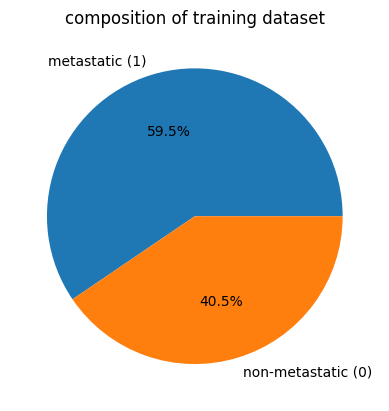

In [149]:
"""
Find total number of images in our training dataset.
Find composition of our traning dataset. 
metastatic = 1
non-metastatic = 0
"""
train_csv = pd.read_csv("Data/train_labels.csv")
#train_csv = train_csv.sample(n=20000)
print("total # of images: " + str(len(train_csv)) + "\n")

composition = train_csv.groupby('label')['id'].nunique()
print(composition)

labels = "metastatic (1)", "non-metastatic (0)" 
sizes = [composition[0], composition[1]] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("composition of training dataset")
plt.show()

In [150]:
"""
Select n images to train machine learning model on. 
Find composition of n images. 
"""
"""
sample = train_csv.sample(n=40000)
print("total # of images: " + str(len(sample)))

sample_composition = sample.groupby('label')['id'].nunique()
labels = "metastatic (1)", "non-metastatic (0)" 
sizes = [sample_composition[0], sample_composition[1]] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("composition of sample dataset")
plt.show()
"""

'\nsample = train_csv.sample(n=40000)\nprint("total # of images: " + str(len(sample)))\n\nsample_composition = sample.groupby(\'label\')[\'id\'].nunique()\nlabels = "metastatic (1)", "non-metastatic (0)" \nsizes = [sample_composition[0], sample_composition[1]] \nfig1, ax1 = plt.subplots()\nax1.pie(sizes, labels=labels, autopct=\'%1.1f%%\')\nplt.title("composition of sample dataset")\nplt.show()\n'

In [151]:
"""
Create a validation set. 
"""

"""
if (os.path.exists("Data/sample_validation")):
    shutil.rmtree("Data/sample_validation")
os.mkdir("Data/sample_validation")
os.mkdir("Data/sample_validation/0")
os.mkdir("Data/sample_validation/1") 
for name in list(sample_validation['id']):
    image = Image.open("Data/train/" + name + ".tif") 
    image_label = sample_validation.loc[sample_validation['id'] == name, 'label'].item()
    if (image_label == 0):
        image.save("Data/sample_validation/0/" + name + ".tif")
    else:
        image.save("Data/sample_validation/1/" + name + ".tif")
"""

valid_csv = train_csv.sample(n=round(len(train_csv) * 0.1)) 
train_csv = pd.merge(train_csv, valid_csv, how='outer', indicator=True) 
train_csv = train_csv.loc[train_csv._merge == 'left_only', ['id', 'label']]

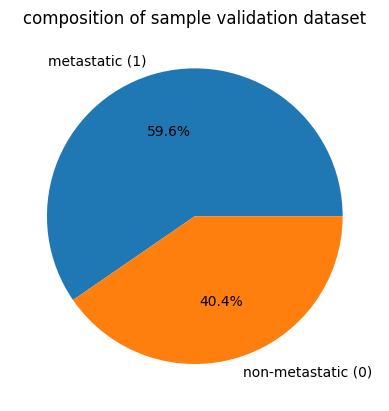

In [152]:
"""
Composition of validation set.
"""
sample_valid_composition = valid_csv.groupby('label')['id'].nunique()
labels = "metastatic (1)", "non-metastatic (0)" 
sizes = [sample_valid_composition[0], sample_valid_composition[1]] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("composition of sample validation dataset")
plt.show()

In [153]:
"""
Create test set.
test_csv = pd.read_csv("Data/train_labels.csv")
test_csv = pd.merge(test_csv, sample_validation, how='outer', indicator=True)
test_csv = test_csv.loc[test_csv._merge == 'left_only', ['id', 'label']]
test_csv = pd.merge(test_csv, train_csv, how='outer', indicator=True)
test_csv = test_csv.loc[test_csv._merge == 'left_only', ['id', 'label']]
"""
"""
if (os.path.exists("Data/sample_test")):
    shutil.rmtree("Data/sample_test")
os.mkdir("Data/sample_test")
os.mkdir("Data/sample_test/0")
os.mkdir("Data/sample_test/1") 
for name in list(test_sample['id']):
    image = Image.open("Data/train/" + name + ".tif") 
    image_label = test_sample.loc[test_sample['id'] == name, 'label'].item()
    if (image_label == 0):
        image.save("Data/sample_test/0/" + name + ".tif")
    else:
        image.save("Data/sample_test/1/" + name + ".tif")
"""

test_csv = train_csv.sample(n=round(len(train_csv) * 0.1)) 
train_csv = pd.merge(train_csv, test_csv, how='outer', indicator=True) 
train_csv = train_csv.loc[train_csv._merge == 'left_only', ['id', 'label']]

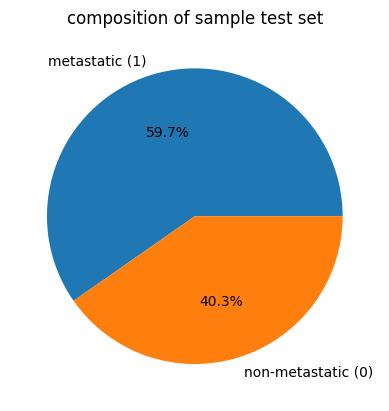

In [154]:
"""
Composition of test set. 
"""
sample_test_composition = test_csv.groupby('label')['id'].nunique()
labels = "metastatic (1)", "non-metastatic (0)" 
sizes = [sample_test_composition[0], sample_test_composition[1]] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("composition of sample test set")
plt.show()

In [155]:
"""
Save images in sample_train folder. 
Separate images between 0 and 1 folders.

if (os.path.exists("Data/sample_train")):
    shutil.rmtree("Data/sample_train")
os.mkdir("Data/sample_train")
os.mkdir("Data/sample_train/0")
os.mkdir("Data/sample_train/1") 
for name in list(sample['id']):
    image = Image.open("Data/train/" + name + ".tif") 
    image_label = sample.loc[sample['id'] == name, 'label'].item()
    if (image_label == 0):
        image.save("Data/sample_train/0/" + name + ".tif")
    else:
        image.save("Data/sample_train/1/" + name + ".tif")
"""

'\nSave images in sample_train folder. \nSeparate images between 0 and 1 folders.\n\nif (os.path.exists("Data/sample_train")):\n    shutil.rmtree("Data/sample_train")\nos.mkdir("Data/sample_train")\nos.mkdir("Data/sample_train/0")\nos.mkdir("Data/sample_train/1") \nfor name in list(sample[\'id\']):\n    image = Image.open("Data/train/" + name + ".tif") \n    image_label = sample.loc[sample[\'id\'] == name, \'label\'].item()\n    if (image_label == 0):\n        image.save("Data/sample_train/0/" + name + ".tif")\n    else:\n        image.save("Data/sample_train/1/" + name + ".tif")\n'

In [156]:
"""
Fetch images and scale.
"""

"""
train_dataset = train_sample.flow_from_directory("Data/sample_train",
                                                target_size=(96, 96),
                                                batch_size=32,
                                                class_mode="binary")

validation_dataset = validation_sample.flow_from_directory("Data/sample_validation",
                                                target_size=(96, 96),
                                                batch_size=32,
                                                class_mode="binary")
"""

train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_csv['id'] = train_csv['id'].astype(str) + '.tif'
train_csv['label'] = train_csv['label'].astype(str)
valid_csv['id'] = valid_csv['id'].astype(str) + '.tif'
valid_csv['label'] = valid_csv['label'].astype(str)
test_csv['id'] = test_csv['id'] + '.tif'
test_csv['label'] = test_csv['label'].astype(str)
train_dataset = train.flow_from_dataframe(train_csv, directory="Data/train", target_size=(96,96), batch_size=32, 
                                        class_mode="binary", x_col="id", y_col="label")
validation_dataset = validation.flow_from_dataframe(valid_csv, directory="Data/train", target_size=(96,96), batch_size=32, 
                                        class_mode="binary", x_col="id", y_col="label")
test_dataset = test.flow_from_dataframe(test_csv, "Data/train", target_size=(96, 96), batch_size=32,
                                        class_mode="binary", x_col="id", y_col="label")

Found 178221 validated image filenames belonging to 2 classes.
Found 22002 validated image filenames belonging to 2 classes.
Found 19802 validated image filenames belonging to 2 classes.


In [162]:
model = Sequential()

# Convolutional layer and maxpool layer 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(96,96,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

# Convolutional layer and maxpool layer 2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

# Convolutional layer and maxpool layer 3
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

# Convolutional layer and maxpool layer 4
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

# This layer flattens the resulting image array to 1D array
model.add(Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

"""
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3)) 

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3)) 

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'elu'))

model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
"""

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 batch_normalization_108 (Ba  (None, 94, 94, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_109 (Ba  (None, 47, 47, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_49 (Conv2D)          (None, 45, 45, 64)        18496     
                                                     

"\nmodel.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (96, 96, 3)))\nmodel.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))\nmodel.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))\nmodel.add(Dropout(0.3))\nmodel.add(MaxPooling2D(pool_size = 3)) \n\nmodel.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) \nmodel.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) \nmodel.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))\nmodel.add(Dropout(0.3))\nmodel.add(MaxPooling2D(pool_size = 3)) \n\nmodel.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))\nmodel.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))\nmodel.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))\nmodel.add(Dropout(0.3))\nmodel.

In [163]:
model.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [164]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, verbose=1) 
model_check = tf.keras.callbacks.ModelCheckpoint("tmp/checkpoint", 
                                                 monitor='val_loss', 
                                                 verbose=0, 
                                                 save_best_only=True,
                                                 mode='auto', 
                                                 save_freq='epoch')

Epoch 1/10
5570/5570 [==============================] - ETA: 0s - loss: 0.3378 - accuracy: 0.8570

INFO:tensorflow:Assets written to: tmp\checkpoint\assets


INFO:tensorflow:Assets written to: tmp\checkpoint\assets


5570/5570 [==============================] - 1389s 249ms/step - loss: 0.3378 - accuracy: 0.8570 - val_loss: 0.4336 - val_accuracy: 0.8167
Epoch 2/10
5570/5570 [==============================] - ETA: 0s - loss: 0.2345 - accuracy: 0.9075

INFO:tensorflow:Assets written to: tmp\checkpoint\assets


INFO:tensorflow:Assets written to: tmp\checkpoint\assets


5570/5570 [==============================] - 1223s 220ms/step - loss: 0.2345 - accuracy: 0.9075 - val_loss: 0.2401 - val_accuracy: 0.9042
Epoch 3/10
5570/5570 [==============================] - 1222s 219ms/step - loss: 0.1959 - accuracy: 0.9250 - val_loss: 0.2442 - val_accuracy: 0.8991
Epoch 4/10
5570/5570 [==============================] - 1214s 218ms/step - loss: 0.1684 - accuracy: 0.9362 - val_loss: 0.2458 - val_accuracy: 0.9046
Epoch 5/10
5570/5570 [==============================] - 1219s 219ms/step - loss: 0.1473 - accuracy: 0.9455 - val_loss: 0.2581 - val_accuracy: 0.8974
Epoch 6/10
5570/5570 [==============================] - ETA: 0s - loss: 0.1262 - accuracy: 0.9534

INFO:tensorflow:Assets written to: tmp\checkpoint\assets


INFO:tensorflow:Assets written to: tmp\checkpoint\assets


5570/5570 [==============================] - 1219s 219ms/step - loss: 0.1262 - accuracy: 0.9534 - val_loss: 0.1868 - val_accuracy: 0.9334
Epoch 7/10
5570/5570 [==============================] - 1216s 218ms/step - loss: 0.1118 - accuracy: 0.9583 - val_loss: 0.3115 - val_accuracy: 0.8918
Epoch 8/10
5570/5570 [==============================] - 1216s 218ms/step - loss: 0.0980 - accuracy: 0.9636 - val_loss: 0.3630 - val_accuracy: 0.8947
Epoch 9/10
5570/5570 [==============================] - 1216s 218ms/step - loss: 0.0881 - accuracy: 0.9679 - val_loss: 0.2671 - val_accuracy: 0.9086
Epoch 9: early stopping
619/619 [==============================] - 84s 137ms/step - loss: 0.2656 - accuracy: 0.9097
[0.26559048891067505, 0.9097061157226562]


Text(0, 0.5, 'accuracy')

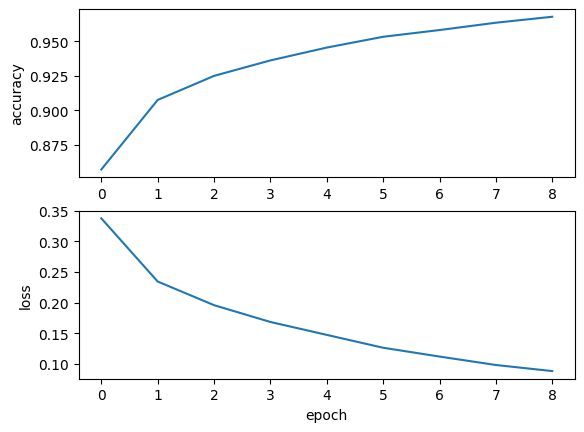

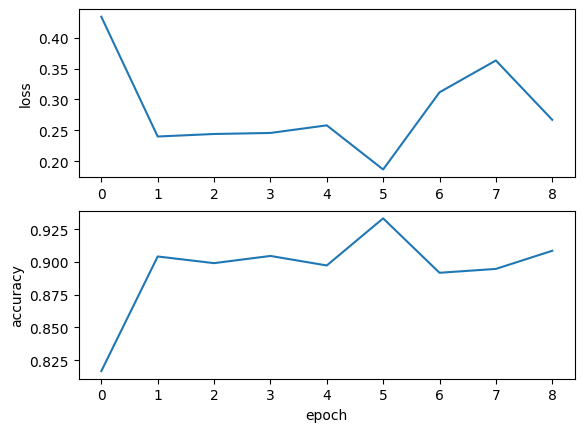

In [165]:
loss = []
accuracy = []

"""
history = model.fit(train_dataset,epochs=20,
 validation_data=validation_dataset, callbacks=[callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )])
"""
history = model.fit(train_dataset,epochs=10,
 validation_data=validation_dataset,
                   callbacks=[model_check, callback])

result = model.evaluate(test_dataset)
print(result)

figure, axis = plt.subplots(2, 1)
axis[0].plot(history.history['accuracy'])
axis[0].set_ylabel('accuracy')

axis[1].plot(history.history['loss'])
axis[1].set_xlabel('epoch')
axis[1].set_ylabel('loss')

figure2, axis2 = plt.subplots(2, 1)
axis2[0].plot(history.history['val_loss'])
axis2[0].set_ylabel('loss')

axis2[1].plot(history.history['val_accuracy'])
axis2[1].set_xlabel('epoch')
axis2[1].set_ylabel('accuracy')

In [166]:
model.load_weights("tmp/checkpoint")
result = model.evaluate(test_dataset)
print(result)

619/619 [==============================] - 31s 50ms/step - loss: 0.1925 - accuracy: 0.9320
[0.1924787014722824, 0.9320270419120789]


In [173]:
saved_model = tf.keras.models.load_model("Data/models")

In [175]:
loss, acc = saved_model.evaluate(test_dataset)

619/619 [==============================] - 30s 47ms/step - loss: 0.1925 - accuracy: 0.9320
